In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
# from sklearn import cross_validation

In [5]:
# defining names of cols
names=['a','b','class']

#loading Training Data
df = pd.read_csv('demo_data/3.concertriccir2.csv',header = None,names=names)

In [6]:
df.head()

,a,b,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [7]:
df.shape

(500, 3)

In [16]:
# creating Matrix 'x' and target vector 'y'

# this is total data framei.e converting df to numpy array
x = np.array(df.iloc[:,0:4])

# this is only class labels of data
y = np.array(df['class'])


In [17]:
x

array([[ 0.70033457, -0.24706758,  0.        ],
       [-3.95001869,  2.74007953,  1.        ],
       [ 0.15022162, -2.1576378 ,  1.        ],
       ...,
       [ 0.89418044,  3.06995865,  0.        ],
       [ 0.84943908,  3.87543489,  0.        ],
       [ 5.21744335,  1.40081765,  0.        ]])

## Simple Cross Validation

In [18]:
#splitting the train and test data

x_1, x_test, y_1, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

#splitting the train data into 2 parts CrossValidation_Train and CrossValidation_test

x_tr, x_cv, y_tr, y_cv = train_test_split(x_1, y_1, test_size=0.3)



In [19]:
for i in range(1,30,2):
    # k = 1,3,5,7,...29
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # fit the modelon CV Train
    knn.fit(x_tr, y_tr)
    
    #Taking Cv data and passing it to the trained data to predict
    pred = knn.predict(x_cv)
    
    # Evaluating CV accuracy i.e Model Accuracy
    # y_cv is actual label and pred is predicted label
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\n CV Accuracy for k = %d is %d %%' %(i,acc))


    


 CV Accuracy for k = 1 is 100 %

 CV Accuracy for k = 3 is 100 %

 CV Accuracy for k = 5 is 100 %

 CV Accuracy for k = 7 is 100 %

 CV Accuracy for k = 9 is 99 %

 CV Accuracy for k = 11 is 98 %

 CV Accuracy for k = 13 is 97 %

 CV Accuracy for k = 15 is 93 %

 CV Accuracy for k = 17 is 92 %

 CV Accuracy for k = 19 is 90 %

 CV Accuracy for k = 21 is 85 %

 CV Accuracy for k = 23 is 82 %

 CV Accuracy for k = 25 is 80 %

 CV Accuracy for k = 27 is 78 %

 CV Accuracy for k = 29 is 77 %


#### Now Lets test the Accuracy on Test Data

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_tr,y_tr)

pred = knn.predict(x_test)

acc = accuracy_score(y_test, pred, normalize=True )*float(100)

print('Test Accuracy for k=1 is %d %%' %(acc))

Test Accuracy for k=1 is 98 %


Observation :<br>
Accuracy for Cross Validation Data is 100% when k=1<br>
Accuracy for Test Data is 98% when k=1

## k-fold Cross Validation


The optimal number of neighbors is 1.


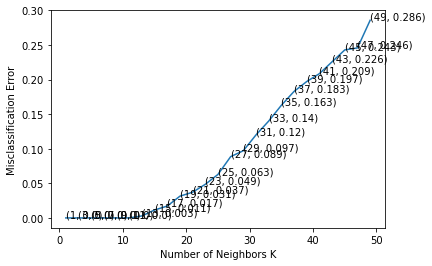

the misclassification error for each k value is :  [0.    0.    0.    0.    0.    0.    0.003 0.011 0.017 0.031 0.037 0.049
 0.063 0.089 0.097 0.12  0.14  0.163 0.183 0.197 0.209 0.226 0.243 0.246
 0.286]
*********************************************************************
optimal k value is:  1


In [21]:
#creating odd list of vals for 'k'

li = list(range(0,50))
neighbors = list(filter(lambda x: x%2 != 0,li))

#empty list to hold CV scores/accuracy
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_1, y_1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))
print('*********************************************************************')
print("optimal k value is: ",optimal_k)

In [22]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(x_1, y_1)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 99.333333%
